In [1]:
import pandas as pd
import os

In [2]:
data_directory = r'D:\Pastas\Infnet\Infnet - 2024.2\Engenharia de Prompts\TP3\dados'

In [3]:
characters_df = pd.read_csv(os.path.join(data_directory, 'simpsons_characters.csv'))
episodes_df = pd.read_csv(os.path.join(data_directory, 'simpsons_episodes.csv'))
locations_df = pd.read_csv(os.path.join(data_directory, 'simpsons_locations.csv'))
script_lines_df = pd.read_csv(os.path.join(data_directory, 'simpsons_script_lines.csv'), low_memory=False)

In [4]:
merged_df = pd.merge(script_lines_df, episodes_df, left_on='episode_id', right_on='id', how='left')


In [5]:
merged_df.head()

,id_x,episode_id,number,raw_text,timestamp_in_ms,speaking_line,character_id,location_id,raw_character_text,raw_location_text,...,number_in_season,number_in_series,original_air_date,original_air_year,production_code,season,title,us_viewers_in_millions,video_url,views
0,9549,32,209,"Miss Hoover: No, actually, it was a little of ...",848000,true,464,3.0,Miss Hoover,Springfield Elementary School,...,19,32,1991-04-25,1991,7F19,2,Lisa's Substitute,17.7,http://www.simpsonsworld.com/video/288011331912,52770.0
1,9550,32,210,Lisa Simpson: (NEAR TEARS) Where's Mr. Bergstrom?,856000,true,9,3.0,Lisa Simpson,Springfield Elementary School,...,19,32,1991-04-25,1991,7F19,2,Lisa's Substitute,17.7,http://www.simpsonsworld.com/video/288011331912,52770.0
2,9551,32,211,Miss Hoover: I don't know. Although I'd sure l...,856000,true,464,3.0,Miss Hoover,Springfield Elementary School,...,19,32,1991-04-25,1991,7F19,2,Lisa's Substitute,17.7,http://www.simpsonsworld.com/video/288011331912,52770.0
3,9552,32,212,Lisa Simpson: That life is worth living.,864000,true,9,3.0,Lisa Simpson,Springfield Elementary School,...,19,32,1991-04-25,1991,7F19,2,Lisa's Substitute,17.7,http://www.simpsonsworld.com/video/288011331912,52770.0
4,9553,32,213,Edna Krabappel-Flanders: The polls will be ope...,864000,true,40,3.0,Edna Krabappel-Flanders,Springfield Elementary School,...,19,32,1991-04-25,1991,7F19,2,Lisa's Substitute,17.7,http://www.simpsonsworld.com/video/288011331912,52770.0


In [6]:
import tiktoken


In [7]:
encoder = tiktoken.get_encoding("cl100k_base")


In [8]:
def estimar_tokens(texto):
    tokens = encoder.encode(texto)
    return len(tokens)

In [9]:
merged_df['normalized_text'] = merged_df['normalized_text'].fillna('').astype(str)


In [10]:
merged_df['token_count'] = merged_df['normalized_text'].apply(estimar_tokens)


In [11]:
tokens_por_episodio = merged_df.groupby('episode_id')['token_count'].sum()
tokens_por_temporada = merged_df.groupby('season')['token_count'].sum()


In [12]:
# Média de tokens por episódio
media_tokens_episodio = tokens_por_episodio.mean()
print(f"Média de tokens por episódio: {media_tokens_episodio}")

# Média de tokens por temporada
media_tokens_temporada = tokens_por_temporada.mean()
print(f"Média de tokens por temporada: {media_tokens_temporada}")



Média de tokens por episódio: 2606.982269503546
Média de tokens por temporada: 56551.46153846154


In [13]:
# Episódio com mais tokens
episodio_mais_tokens = tokens_por_episodio.idxmax()
print(f"Episódio com mais tokens: Episódio ID {episodio_mais_tokens}, {tokens_por_episodio[episodio_mais_tokens]} tokens")

# Temporada com mais tokens
temporada_mais_tokens = tokens_por_temporada.idxmax()
print(f"Temporada com mais tokens: Temporada {temporada_mais_tokens}, {tokens_por_temporada[temporada_mais_tokens]} tokens")

Episódio com mais tokens: Episódio ID 49, 3454 tokens
Temporada com mais tokens: Temporada 7, 70418 tokens


In [14]:
from dotenv import load_dotenv
import os

load_dotenv()

api_key = os.getenv("GEMINI_KEY")

In [15]:
import google.generativeai as genai


c:\Users\Dani\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## TESTE DA API

In [16]:
genai.configure(api_key=api_key)
model = genai.GenerativeModel("gemini-1.5-flash")
response = model.generate_content("Teste da configuração da API do Google Generative AI.")
print(response.text)

Para testar a configuração da API do Google Generative AI, você precisa seguir alguns passos, que variam dependendo de qual API você está usando (PaLM 2, Imagen, etc.) e qual SDK ou biblioteca você está empregando.  Não existe um único "teste" universal.  Mas aqui estão algumas etapas e exemplos genéricos para ajudar:

**1. Pré-requisitos:**

* **Conta do Google Cloud:** Você precisa de uma conta ativa e faturamento habilitado no Google Cloud Platform (GCP).
* **Projeto do GCP:** Crie um novo projeto ou use um existente.
* **Habilitação da API:**  Ative a API específica do Generative AI que você quer usar (ex: Vertex AI).  Você encontra isso na console do GCP, procurando por "APIs & Serviços" e então "Biblioteca de APIs".
* **Credenciais de autenticação:** Gere credenciais de serviço (chave JSON) para o seu projeto.  Essas credenciais permitem que seu código se autentique com a API.  **Mantenha essa chave em segurança!**
* **SDK ou Biblioteca:**  Escolha um SDK (ex: Python com o `googl

In [17]:
print(merged_df.columns)


Index(['id_x', 'episode_id', 'number', 'raw_text', 'timestamp_in_ms',
       'speaking_line', 'character_id', 'location_id', 'raw_character_text',
       'raw_location_text', 'spoken_words', 'normalized_text', 'word_count',
       'id_y', 'image_url', 'imdb_rating', 'imdb_votes', 'number_in_season',
       'number_in_series', 'original_air_date', 'original_air_year',
       'production_code', 'season', 'title', 'us_viewers_in_millions',
       'video_url', 'views', 'token_count'],
      dtype='object')


In [18]:
cols = ['episode_id', 'season','original_air_date', 'imdb_rating', 
        'imdb_votes', 'us_viewers_in_millions', 'views']
episode_stats = merged_df[cols].drop_duplicates()

episode_stats.to_csv('series_data.csv', sep=';', index=None)

In [19]:
from google.generativeai.types import HarmCategory, HarmBlockThreshold
import json


In [30]:
prompt_start = f"""
You are a data scientist high specialized in analysing entertainment content. You are working on the show series
"The Simpsons", investigating patterns in the series series_data. 
How can we evaluate the relationship between episode ratings ('episode_imdb_rating', 'episode_imdb_votes')
and audiences ('episode_us_viewers_in_millions', 'episode_views') in series_data.csv, considering it a CSV file
splitted by ';' with columns:

- episode_id: episode unique identifier
- season: episode season number
- original_air_date: date that the episode was first exhibited
- imdb_rating: episode with the IMDB rating 
- imdb_votes: episode with the number of voters
- us_viewers_in_millions: number of episode viewers (in millions)
- views: total number of episode views.

Generate a list of 5 analyses that can be implemented given the available series_data, as a JSON file:
{[
    {'Name':'analysis name',
     'Objective': 'what we need to analyze',
     'Method': 'how we analyze it'
    }
]
}
"""


genai.configure(api_key=os.getenv("GEMINI_API_KEY"))
model = genai.GenerativeModel("gemini-1.5-flash")
response = model.generate_content(prompt_start)
analysis = json.loads(response.text.replace("```json\n",'').replace("\n```",''))
analysis

[{'Name': 'Correlation Analysis of Ratings and Viewership',
  'Objective': 'To determine the strength and direction of the linear relationship between episode ratings (IMDB rating and votes) and audience metrics (US viewers and total views).',
  'Method': "Calculate Pearson correlation coefficients between 'episode_imdb_rating' and 'episode_us_viewers_in_millions', 'episode_imdb_rating' and 'episode_views', 'episode_imdb_votes' and 'episode_us_viewers_in_millions', and 'episode_imdb_votes' and 'episode_views'.  Visualize the relationships using scatter plots to identify potential non-linear relationships or outliers."},
 {'Name': 'Regression Analysis of Viewership Prediction',
  'Objective': 'To build a model that predicts episode viewership (both US viewers and total views) based on episode ratings (IMDB rating and votes).',
  'Method': "Employ multiple linear regression with 'episode_imdb_rating' and 'episode_imdb_votes' as predictors and 'episode_us_viewers_in_millions' and 'episode

In [31]:
prompt_analysis = f"""
You are a data scientist high specialized in analysing entertainment content. You are working on the show series
"The Simpsons", investigating patterns in the series series_data. 
How can we evaluate the relationship between episode ratings ('episode_imdb_rating', 'episode_imdb_votes')
and audiences ('episode_us_viewers_in_millions', 'episode_views') in "series_data.csv", considering it a CSV file
splitted by ';' with columns:

- id: episode unique identifier
- season: episode season number
- original_air_date: date that the episode was first exhibited
- imdb_rating: episode with the IMDB rating 
- imdb_votes: episode with the number of voters
- us_viewers_in_millions: number of episode viewers (in millions)
- views: total number of episode views.

Implement the analysis described below in python.
Output only the code, no need for explanations.
## ANALYSIS
{analysis[0]}
"""


genai.configure(api_key=os.getenv("GEMINI_API_KEY"))
model = genai.GenerativeModel("gemini-1.5-flash")
response = model.generate_content(prompt_analysis)
print(response.text)

```python
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
series_data = pd.read_csv("series_data.csv", sep=";")

# Rename columns for consistency
series_data = series_data.rename(columns={
    'imdb_rating': 'episode_imdb_rating',
    'imdb_votes': 'episode_imdb_votes',
    'us_viewers_in_millions': 'episode_us_viewers_in_millions',
    'views': 'episode_views'
})


# Calculate Pearson correlation coefficients
correlation_matrix = series_data[['episode_imdb_rating', 'episode_imdb_votes', 'episode_us_viewers_in_millions', 'episode_views']].corr()

# Print the correlation matrix
print(correlation_matrix)

# Create scatter plots
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.scatterplot(x='episode_imdb_rating', y='episode_us_viewers_in_millions', data=series_data)
plt.title('IMDB Rating vs. US Viewers')

plt.subplot(2, 2, 2)
sns.scatterplot(x='episode_imdb_rating', y='episode_views', data=series_data)
plt.title('IMDB Rating vs. Total Vi

                                episode_imdb_rating  episode_imdb_votes  \
episode_imdb_rating                        1.000000            0.780556   
episode_imdb_votes                         0.780556            1.000000   
episode_us_viewers_in_millions             0.610862            0.768896   
episode_views                              0.594384            0.655752   

                                episode_us_viewers_in_millions  episode_views  
episode_imdb_rating                                   0.610862       0.594384  
episode_imdb_votes                                    0.768896       0.655752  
episode_us_viewers_in_millions                        1.000000       0.516846  
episode_views                                         0.516846       1.000000  


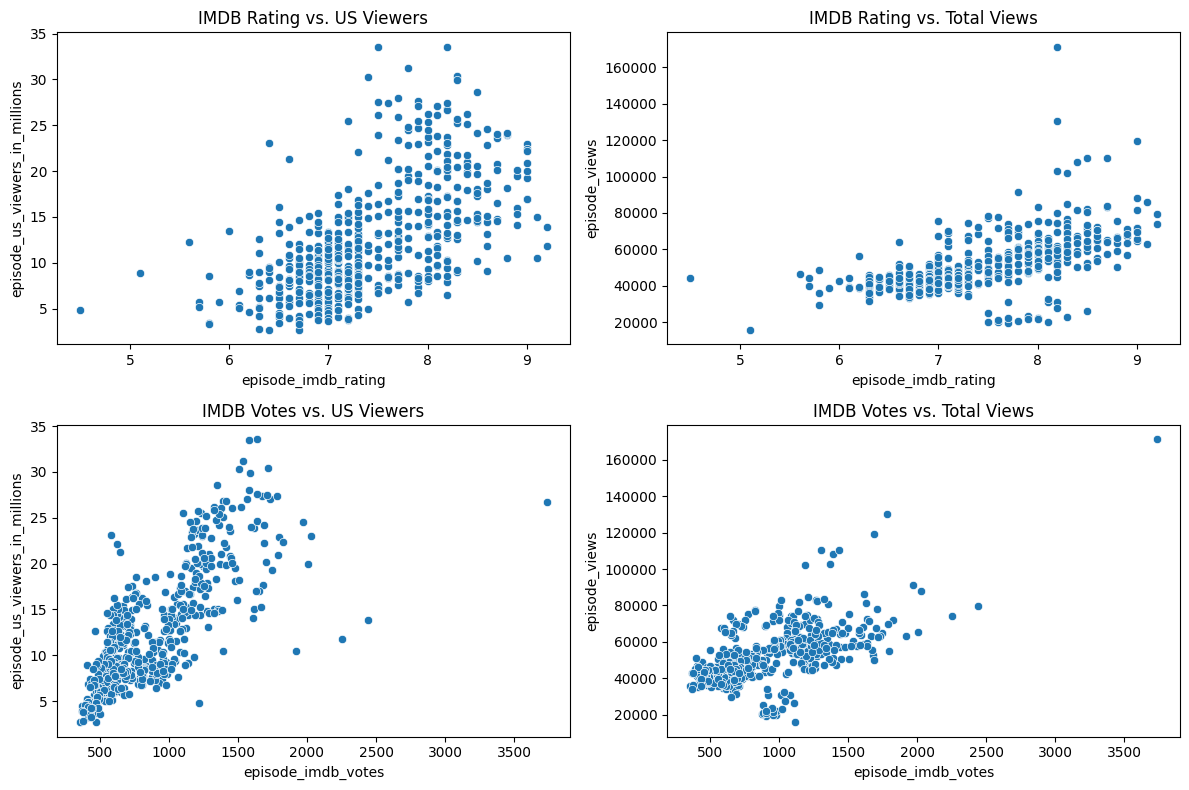

In [32]:
import statsmodels
import seaborn as sns
analysis_code = response.text.replace("```python\n",'').replace("\n```",'')
exec(analysis_code)

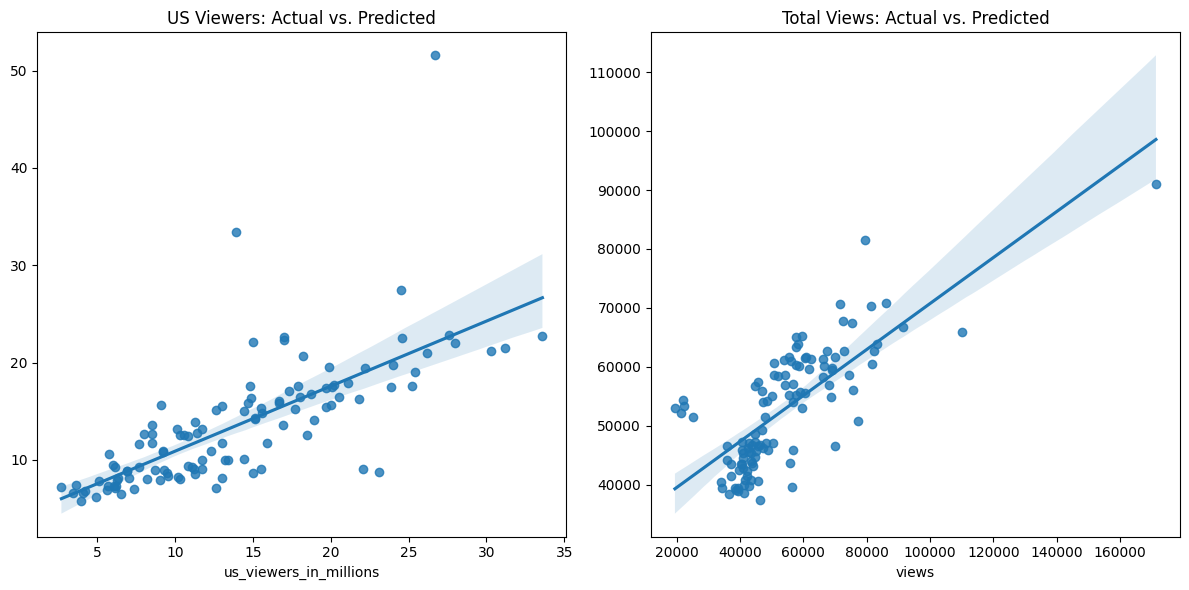

US Viewers - R-squared: 0.47, RMSE: 5.00
Total Views - R-squared: 0.51, RMSE: 13462.24


<string>:65: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

<string>:68: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



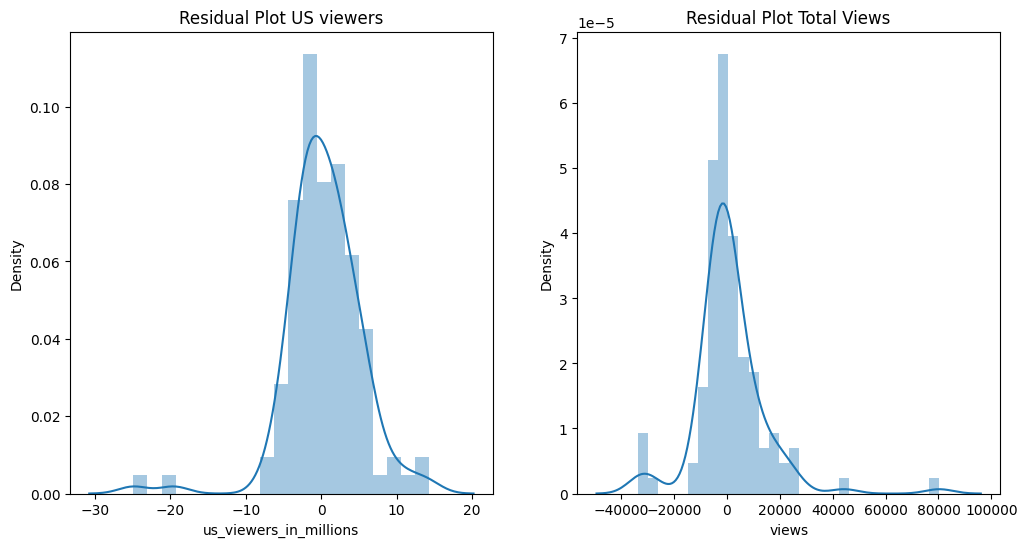

In [38]:
prompt_analysis = f"""
You are a data scientist high specialized in analysing entertainment content. You are working on the show series
"The Simpsons", investigating patterns in the series series_data. 
How can we evaluate the relationship between episode ratings ('imdb_rating', 'imdb_votes')
and audiences ('us_viewers_in_millions', 'views') in "series_data.csv", considering it a CSV file. There might be NaN values. Drop them. Make some cool visualizations
for a presentation.
splitted by ';' with columns:

- id: episode unique identifier
- season: episode season number
- original_air_date: date that the episode was first exhibited
- imdb_rating: episode with the IMDB rating 
- imdb_votes: episode with the number of voters
- us_viewers_in_millions: number of episode viewers (in millions)
- views: total number of episode views.

Implement the analysis described below in python.
Output only the code, no need for explanations.
## ANALYSIS
{analysis[1]}
"""

genai.configure(api_key=os.getenv("GEMINI_API_KEY"))
model = genai.GenerativeModel("gemini-1.5-flash")
response = model.generate_content(prompt_analysis)

analysis_code = response.text.replace("```python\n",'').replace("\n```",'')
exec(analysis_code)

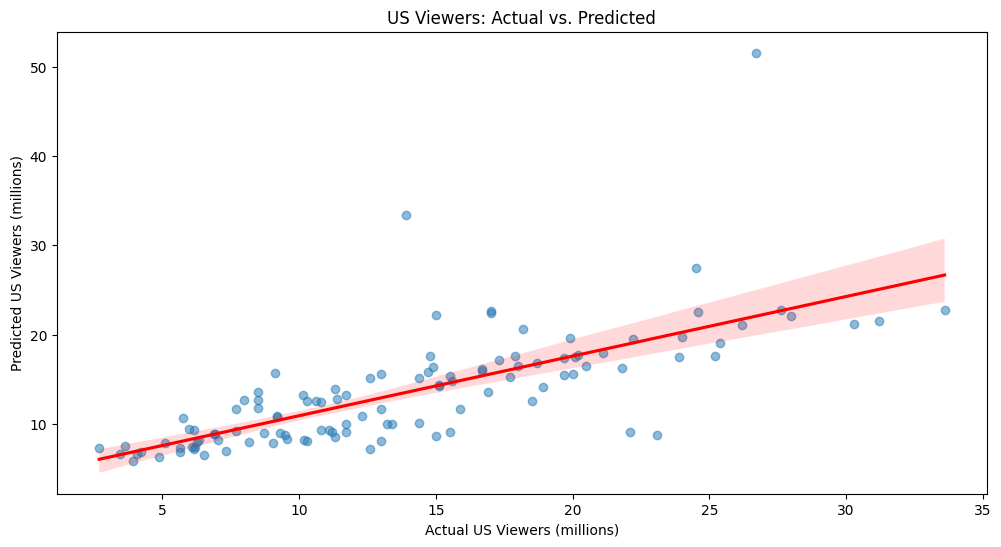

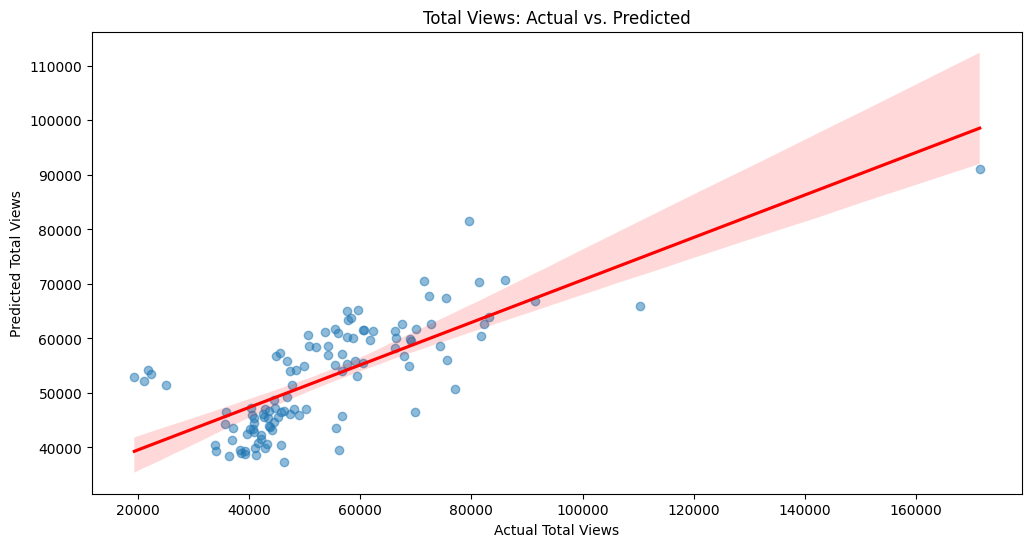

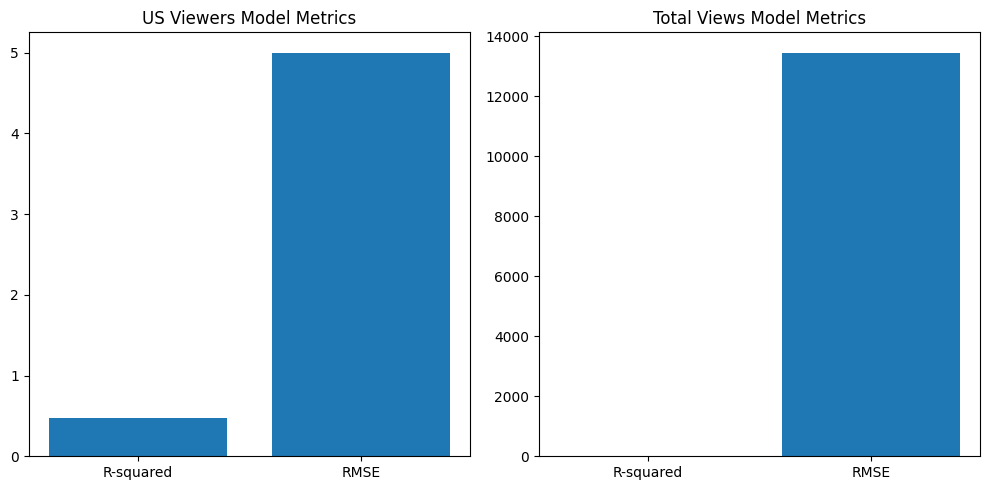

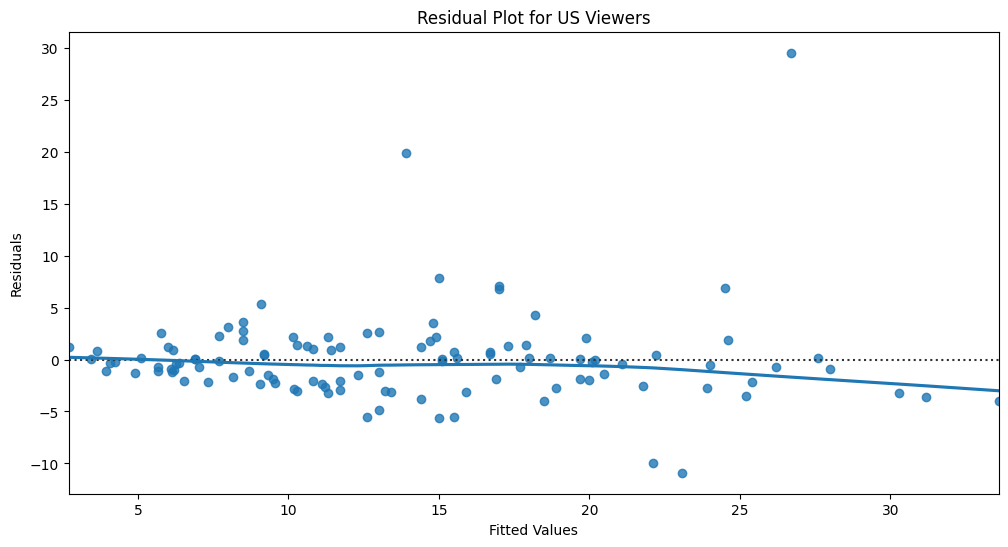

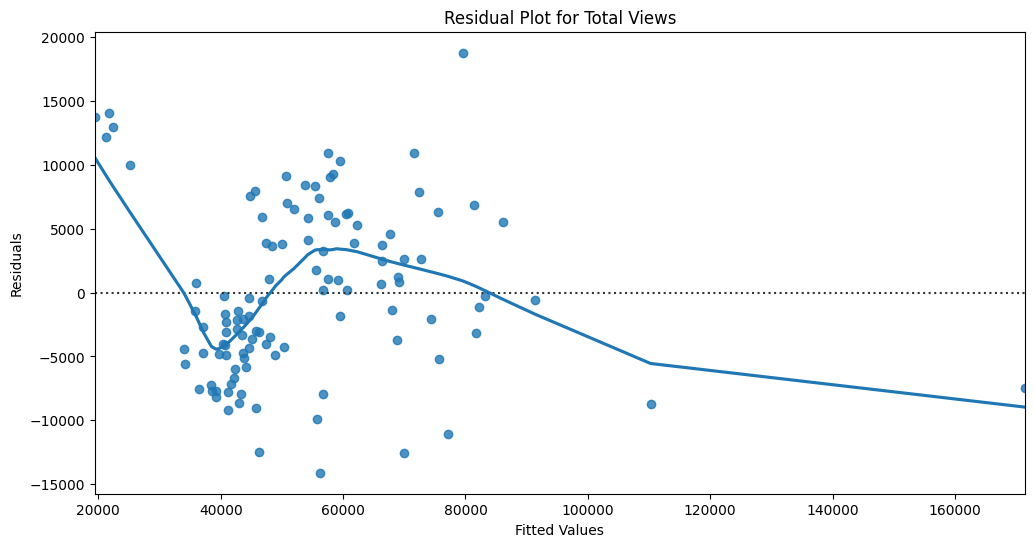

US Viewers R-squared: 0.47
US Viewers RMSE: 5.00
Total Views R-squared: 0.51
Total Views RMSE: 13462.24


In [39]:
prompt_analysis = f"""
You are a data scientist high specialized in analysing entertainment content. You are working on the show series
"The Simpsons", investigating patterns in the series series_data. 
How can we evaluate the relationship between episode ratings ('imdb_rating', 'imdb_votes')
and audiences ('us_viewers_in_millions', 'views') in "series_data.csv", considering it a CSV file. There might be NaN values. Drop them. Make some cool visualizations
for a presentation. Make high use of matplotlib, seaborn and everything that might be out there for a great company presentation. Keep in mind that this presentation is
worth millions of dollars.
splitted by ';' with columns:

- id: episode unique identifier
- season: episode season number
- original_air_date: date that the episode was first exhibited
- imdb_rating: episode with the IMDB rating 
- imdb_votes: episode with the number of voters
- us_viewers_in_millions: number of episode viewers (in millions)
- views: total number of episode views.

Implement the analysis described below in python.
Output only the code, no need for explanations.
## ANALYSIS
{analysis[1]}
"""

genai.configure(api_key=os.getenv("GEMINI_API_KEY"))
model = genai.GenerativeModel("gemini-1.5-flash")
response = model.generate_content(prompt_analysis)

analysis_code = response.text.replace("```python\n",'').replace("\n```",'')
exec(analysis_code)

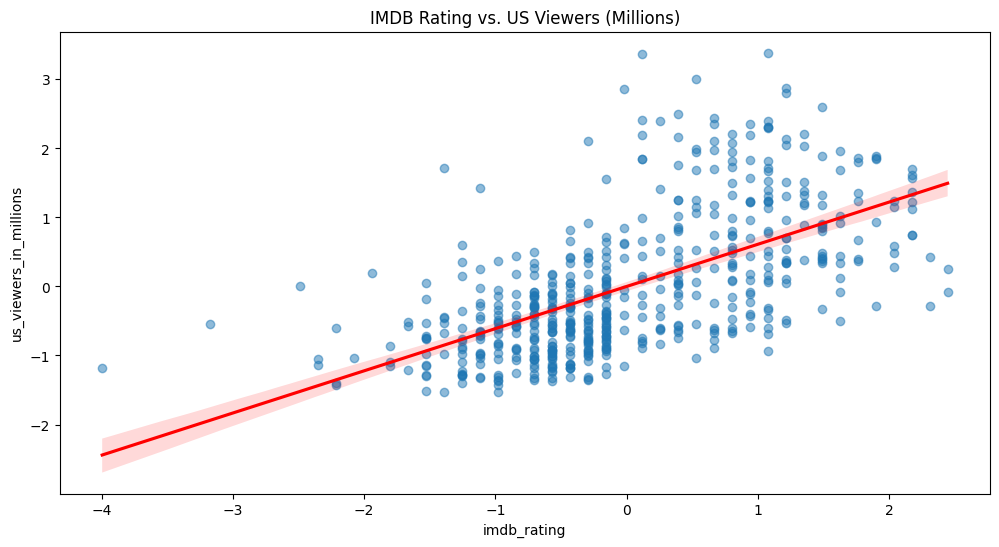

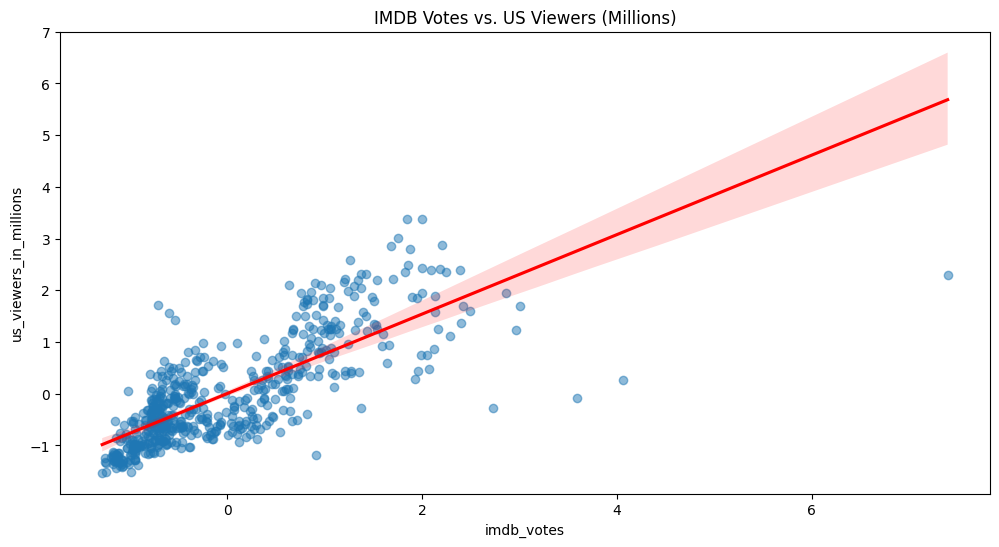

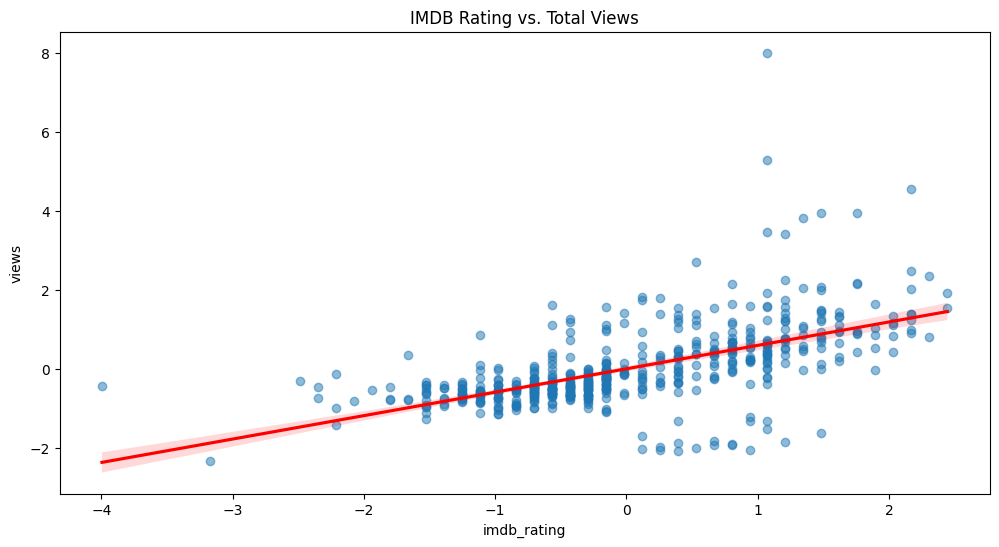

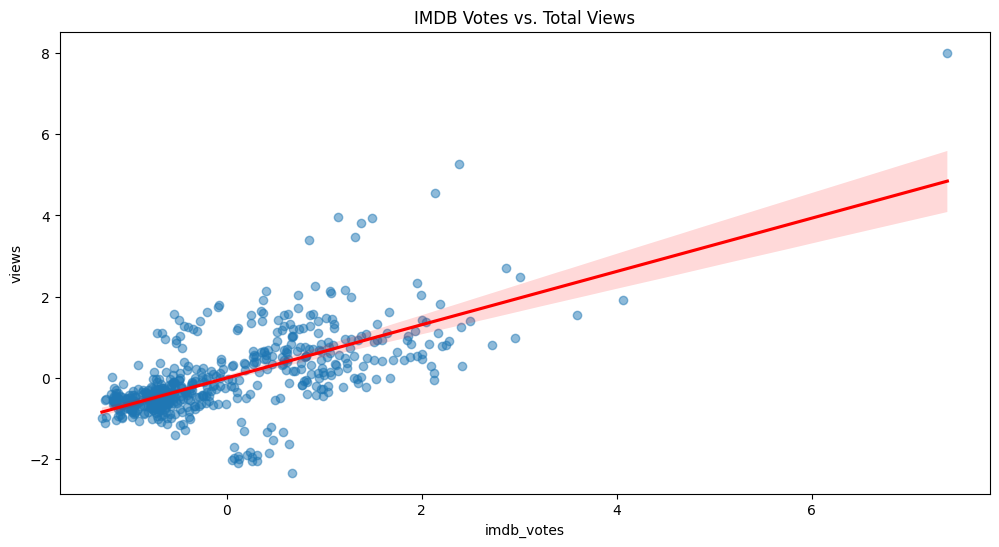

US Viewers - R-squared: 0.4724, RMSE: 0.7944
Total Views - R-squared: 0.5057, RMSE: 0.8940


In [40]:
prompt_analysis = f"""
You are a data scientist high specialized in analysing entertainment content. You are working on the show series
"The Simpsons", investigating patterns in the series series_data. 
How can we evaluate the relationship between episode ratings ('imdb_rating', 'imdb_votes')
and audiences ('us_viewers_in_millions', 'views') in "series_data.csv", considering it a CSV file. There might be NaN values. Drop them. Make some cool visualizations
for a presentation. Make high use of matplotlib, seaborn and everything that might be out there for a great company presentation. Keep in mind that this presentation is
worth millions of dollars. Also make a great analysis.
splitted by ';' with columns:

- id: episode unique identifier
- season: episode season number
- original_air_date: date that the episode was first exhibited
- imdb_rating: episode with the IMDB rating 
- imdb_votes: episode with the number of voters
- us_viewers_in_millions: number of episode viewers (in millions)
- views: total number of episode views.

Implement the analysis described below in python.
Output only the code, no need for explanations.
## ANALYSIS
{analysis[1]}
"""

genai.configure(api_key=os.getenv("GEMINI_API_KEY"))
model = genai.GenerativeModel("gemini-1.5-flash")
response = model.generate_content(prompt_analysis)

analysis_code = response.text.replace("```python\n",'').replace("\n```",'')
exec(analysis_code)